<a href="https://colab.research.google.com/github/JyothsnaGH/PythonforFinance/blob/main/EfficientFrontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harry Markowitz founded the Modern Portfolio Theory (MPT), in which the most fundamental aspect is to **maximize** **returns** while **minimizing risks**.


### MPT means that investors can increase their returns, while minimizing or having no additional risk, by investing in different asset classes instead of just one.

### Having a combination of securities that lack correlation with each other, allows investors to increase or optimize their returns without increasing the risk of their portfolio.

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
import datetime

In [11]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [17]:
tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN','LLY','SPY']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-01-02 00:00:00-05:00,122.357414,43.422436,79.273941,71.589775,195.263596,123.702301,300.291534
2020-01-03 00:00:00-05:00,121.303802,43.040665,78.307518,70.910255,194.938400,123.290596,298.017731
2020-01-06 00:00:00-05:00,121.419334,43.313370,78.717812,71.469872,193.665421,123.749084,299.154633
2020-01-07 00:00:00-05:00,120.929893,43.022480,78.280167,71.062157,189.484207,123.982979,298.313538
2020-01-08 00:00:00-05:00,122.785690,42.958843,78.599281,71.565811,189.855865,125.105759,299.903381
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,128.346893,68.213684,113.713264,176.723465,358.769989,794.910034,592.906433
2024-12-24 00:00:00-05:00,129.720123,68.542015,114.160919,178.318420,361.630005,794.301025,599.496582
2024-12-26 00:00:00-05:00,130.536087,68.542015,114.668251,177.525894,360.429993,792.773682,599.536499


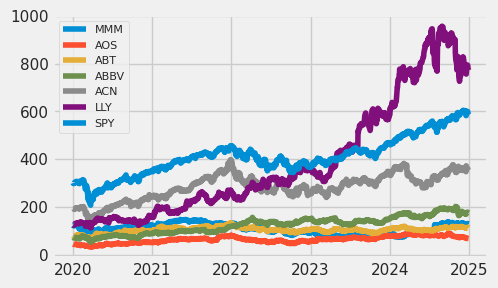

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [35]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.008648,-0.008831,-0.012266,-0.009537,-0.001667,-0.003334,-0.007601
2020-01-06 00:00:00-05:00,0.000952,0.006316,0.005226,0.007861,-0.006552,0.003712,0.003808
2020-01-07 00:00:00-05:00,-0.004039,-0.006739,-0.005575,-0.005721,-0.021826,0.001888,-0.002816
2020-01-08 00:00:00-05:00,0.015229,-0.001480,0.004068,0.007063,0.001960,0.009015,0.005315


In [20]:
data.mean()*250

,0
MMM,0.009736
AOS,0.088258
ABT,0.069108
ABBV,0.177264
ACN,0.117476
LLY,0.364313
SPY,0.133123


In [36]:
cov_matrix = data.cov() * 250
cov_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
MMM,0.084735,0.044532,0.029603,0.022298,0.039522,0.019445,0.034763
AOS,0.044532,0.090048,0.027495,0.019606,0.041046,0.020330,0.036544
ABT,0.029603,0.027495,0.067746,0.028886,0.039750,0.030728,0.033485
ABBV,0.022298,0.019606,0.028886,0.061874,0.026031,0.031754,0.024058
ACN,0.039522,0.041046,0.039750,0.026031,0.085552,0.029804,0.047499
LLY,0.019445,0.020330,0.030728,0.031754,0.029804,0.102445,0.028939
SPY,0.034763,0.036544,0.033485,0.024058,0.047499,0.028939,0.044097


In [37]:
corr_matrix =data.corr() * 250
corr_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
MMM,250.000000,127.451194,97.678455,76.986552,116.045036,52.176143,142.174857
AOS,127.451194,250.000000,88.007052,65.666495,116.912913,52.917413,144.982536
ABT,97.678455,88.007052,250.000000,111.538680,130.531547,92.211004,153.158733
ABBV,76.986552,65.666495,111.538680,250.000000,89.445930,99.711658,115.146176
ACN,116.045036,116.912913,130.531547,89.445930,250.000000,79.588164,193.334641
LLY,52.176143,52.917413,92.211004,99.711658,79.588164,250.000000,107.640197
SPY,142.174857,144.982536,153.158733,115.146176,193.334641,107.640197,250.000000


In [29]:
portfolio1 = data[['MMM','LLY']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,MMM,LLY
MMM,0.084735,0.019445
LLY,0.019445,0.102445


In [43]:
w = {'MMM': 0.1, 'LLY': 0.2, 'AOS': 0.2, 'ABT': 0.1, 'ABBV': 0.2, 'ACN': 0.05, 'SPY': 0.15}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.03703093728835892)

In [44]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-44-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
MMM,0.045164
AOS,0.144306
ABT,0.041581
ABBV,0.185137
ACN,0.153931
LLY,0.487153
SPY,0.155179


In [46]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.13862813534093885)

In [48]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
MMM,0.291209
AOS,0.300200
ABT,0.260385
ABBV,0.248844
ACN,0.292609
LLY,0.320197
SPY,0.210075


In [49]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MMM,0.045164,0.291209
AOS,0.144306,0.300200
ABT,0.041581,0.260385
ABBV,0.185137,0.248844
ACN,0.153931,0.292609
LLY,0.487153,0.320197
SPY,0.155179,0.210075


In [51]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [52]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [54]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [55]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,MMM weight,AOS weight,ABT weight,ABBV weight,ACN weight,LLY weight,SPY weight
0,0.171017,3.117031,0.186972,0.214905,0.154156,0.155555,0.120510,0.155874,0.012028
1,0.167789,3.016823,0.057297,0.199849,0.210329,0.177885,0.020159,0.119513,0.214966
2,0.232120,3.163830,0.039390,0.218544,0.079610,0.125622,0.128755,0.268369,0.139709
3,0.194512,3.104082,0.076255,0.084437,0.207319,0.236011,0.170454,0.196804,0.028719
4,0.127534,3.055736,0.183749,0.095452,0.265791,0.208830,0.071606,0.053122,0.121451


<Axes: xlabel='Volatility', ylabel='Returns'>

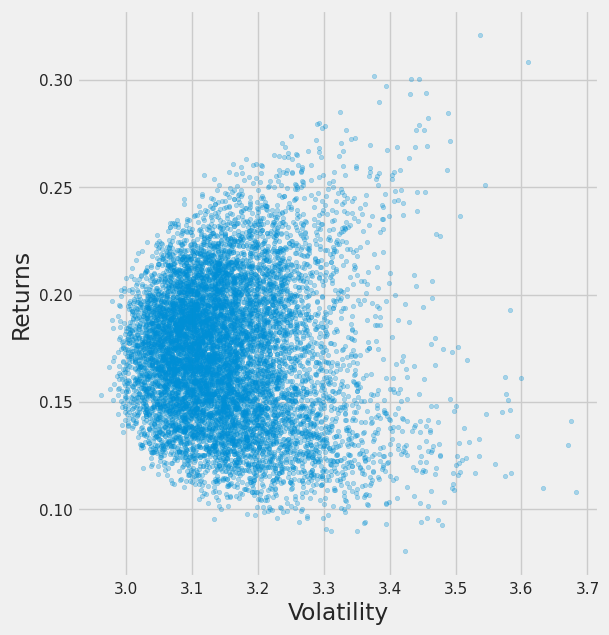

In [60]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,7])